<a href="https://colab.research.google.com/github/Onyipho/MEAI_SC/blob/main/X_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [87]:
# Load the historical exchange rate data
data = pd.read_csv('/content/eurusd_hist_data.csv')
data['Date'] = pd.to_datetime(data['Date'])

In [88]:
data.tail(10)

,Date,Price,Open,High,Low
6593,2024-03-11,1.0926,1.0944,1.0948,1.0914
6594,2024-03-12,1.0924,1.0925,1.0946,1.0899
6595,2024-03-13,1.0946,1.0926,1.0964,1.0920
6596,2024-03-14,1.0881,1.0950,1.0955,1.0880
6597,2024-03-15,1.0887,1.0883,1.0900,1.0872
6598,2024-03-18,1.0871,1.0893,1.0906,1.0865
6599,2024-03-19,1.0865,1.0873,1.0877,1.0834
6600,2024-03-20,1.0918,1.0864,1.0924,1.0836
6601,2024-03-21,1.0860,1.0921,1.0943,1.0855
6602,2024-03-22,1.0805,1.0860,1.0869,1.0802


In [89]:
column_names = ['Open','High','Low']
data.drop(column_names, axis=1,inplace=True)

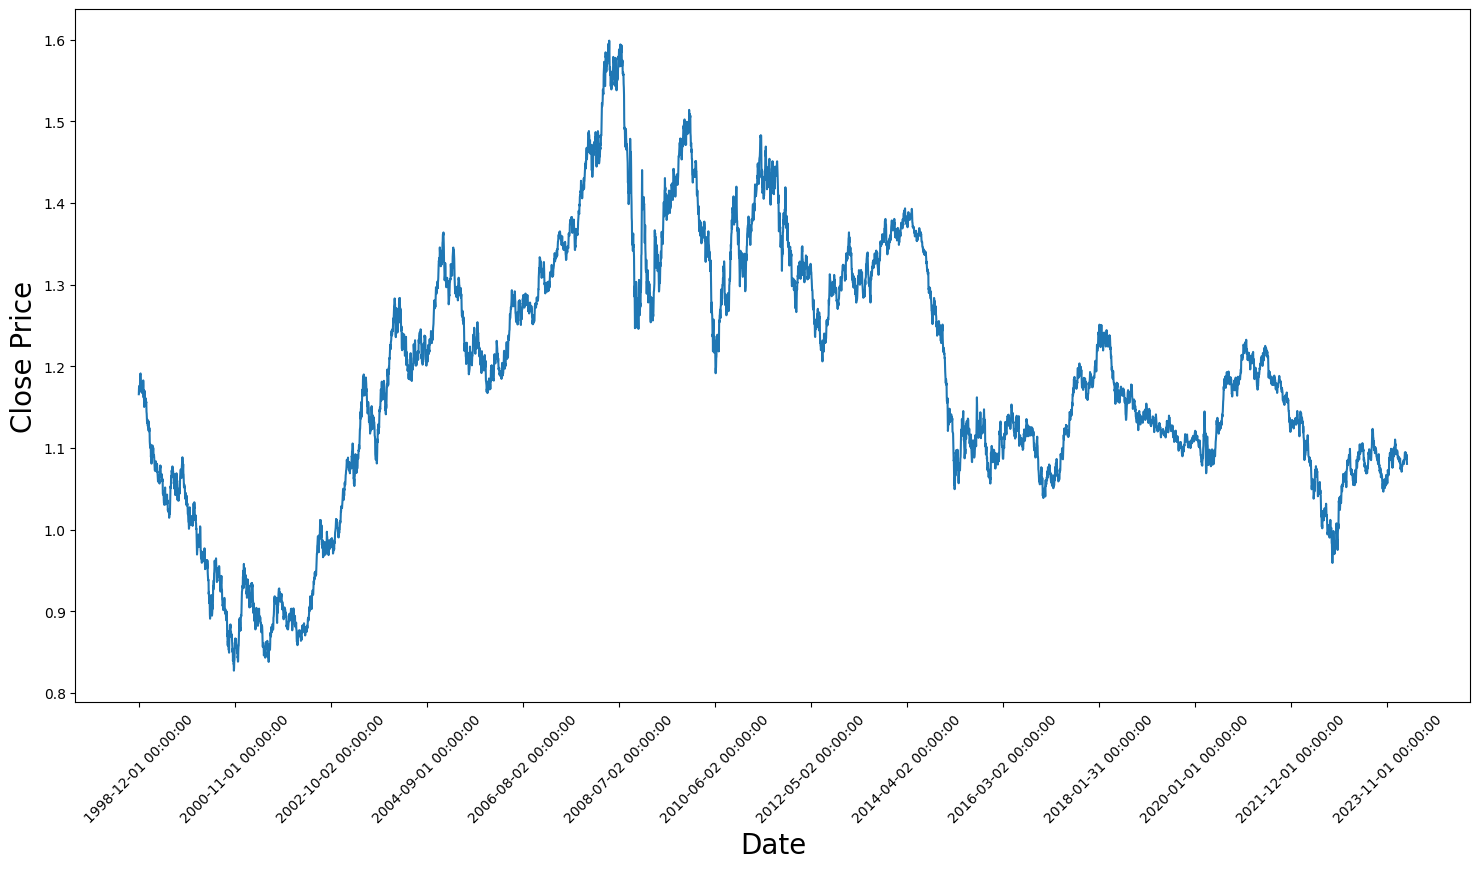

In [90]:
plt.figure(figsize=(18,9))
plt.plot(range(data.shape[0]),data['Price'])
plt.xticks(range(0,data.shape[0],500),data['Date'].loc[::500],rotation=45)
plt.xlabel('Date',fontsize=20)
plt.ylabel('Close Price',fontsize=20)
plt.show()

In [91]:
data.tail()

,Date,Price
6598,2024-03-18,1.0871
6599,2024-03-19,1.0865
6600,2024-03-20,1.0918
6601,2024-03-21,1.0860
6602,2024-03-22,1.0805


In [92]:
# Normalize the features (closing prices)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Price'].values.reshape(-1, 1))


In [93]:
data.shape

(6603, 2)

In [94]:
# Create sequences and labels
def create_sequences(data, seq_length):
    sequences = []
    labels = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
        labels.append(data[i+seq_length])
    return np.array(sequences), np.array(labels)


In [95]:
seq_length = 100
X, y = create_sequences(scaled_data, seq_length)

In [96]:
# Split data into training and testing sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [97]:

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50,return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.1))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(tf.keras.layers.GRU(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [98]:
#Compiling the model
model.compile(optimizer='adam', loss='mse')

In [99]:
# Train model
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
163/163 [==============================] - 31s 150ms/step - loss: 0.0102
Epoch 2/10
163/163 [==============================] - 24s 144ms/step - loss: 0.0028
Epoch 3/10
163/163 [==============================] - 24s 147ms/step - loss: 0.0026
Epoch 4/10
163/163 [==============================] - 24s 149ms/step - loss: 0.0025
Epoch 5/10
163/163 [==============================] - 24s 150ms/step - loss: 0.0021
Epoch 6/10
163/163 [==============================] - 24s 150ms/step - loss: 0.0021
Epoch 7/10
163/163 [==============================] - 24s 149ms/step - loss: 0.0019
Epoch 8/10
163/163 [==============================] - 24s 150ms/step - loss: 0.0018
Epoch 9/10
163/163 [==============================] - 24s 149ms/step - loss: 0.0017
Epoch 10/10
163/163 [==============================] - 24s 150ms/step - loss: 0.0018


In [100]:
# Make predictions on test set and future forecast
train_predictions = model.predict(X_train)
y_hat = model.predict(X_test)


41/41 [==============================] - 2s 38ms/step


In [58]:
# Inverse scaling to get the original exchange rate values
#train_predictions = scaler.inverse_transform(train_predictions)
#y_hat = scaler.inverse_transform(y_hat)

In [101]:
y_hat.shape

(1301, 1)

In [102]:
print(y_hat)

[[0.39371914]
 [0.3916006 ]
 [0.38918963]
 ...
 [0.340553  ]
 [0.33991534]
 [0.33912838]]


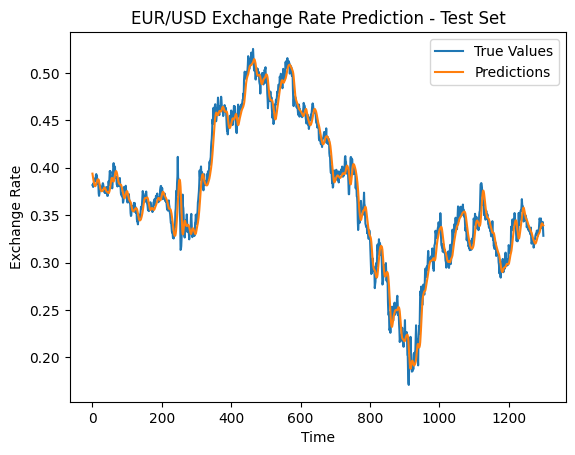

In [104]:
# Plot predicted values vs. true values for test set
plt.plot(y_test.flatten(), label='True Values')
plt.plot(y_hat.flatten(), label='Predictions')
plt.xlabel('Time')
plt.ylabel('Exchange Rate')
plt.title('EUR/USD Exchange Rate Prediction - Test Set')
plt.legend()
plt.show()


In [105]:
# Generate future dates for prediction
last_date = data['Date'].iloc[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30, freq='D')  # Predicting for the next 30 days

In [106]:
print(future_dates)

DatetimeIndex(['2024-03-23', '2024-03-24', '2024-03-25', '2024-03-26',
               '2024-03-27', '2024-03-28', '2024-03-29', '2024-03-30',
               '2024-03-31', '2024-04-01', '2024-04-02', '2024-04-03',
               '2024-04-04', '2024-04-05', '2024-04-06', '2024-04-07',
               '2024-04-08', '2024-04-09', '2024-04-10', '2024-04-11',
               '2024-04-12', '2024-04-13', '2024-04-14', '2024-04-15',
               '2024-04-16', '2024-04-17', '2024-04-18', '2024-04-19',
               '2024-04-20', '2024-04-21'],
              dtype='datetime64[ns]', freq='D')


In [107]:
future_dates.shape

(30,)

In [108]:
# Normalize the features (closing prices)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Price'].values.reshape(-1, 1))


In [110]:
# Predict future values
future_values = []
sequence_length = 20  # Adjust this based on your model's input shape

In [111]:
for i in range(len(future_dates)):
    last_sequence = scaled_data[-sequence_length:].reshape(1, sequence_length, 1)
    next_day_prediction = model.predict(last_sequence)[0, 0]
    future_values.append(next_day_prediction)
    scaled_data = np.append(scaled_data, next_day_prediction).reshape(-1, 1)


1/1 [==============================] - 0s 25ms/step


In [112]:
# Inverse scaling to get the original exchange rate values
future_values = scaler.inverse_transform(np.array(future_values).reshape(-1, 1))

In [113]:
print(future_values)

[[1.0850602]
 [1.0840025]
 [1.0829334]
 [1.0818954]
 [1.0808867]
 [1.0799365]
 [1.07902  ]
 [1.078119 ]
 [1.0772467]
 [1.0763958]
 [1.0755334]
 [1.0746628]
 [1.0737921]
 [1.0729333]
 [1.0720444]
 [1.0711685]
 [1.0702927]
 [1.0694221]
 [1.068582 ]
 [1.0677128]
 [1.0668261]
 [1.0659746]
 [1.0651217]
 [1.0642682]
 [1.0634152]
 [1.0625632]
 [1.0617129]
 [1.0608646]
 [1.0600184]
 [1.0591745]]


In [114]:
future_values.shape

(30, 1)

In [115]:
# Create a DataFrame with the predicted values and corresponding dates
forecast_df = pd.DataFrame({'Date': future_dates, 'Predicted Value': future_values.flatten()})

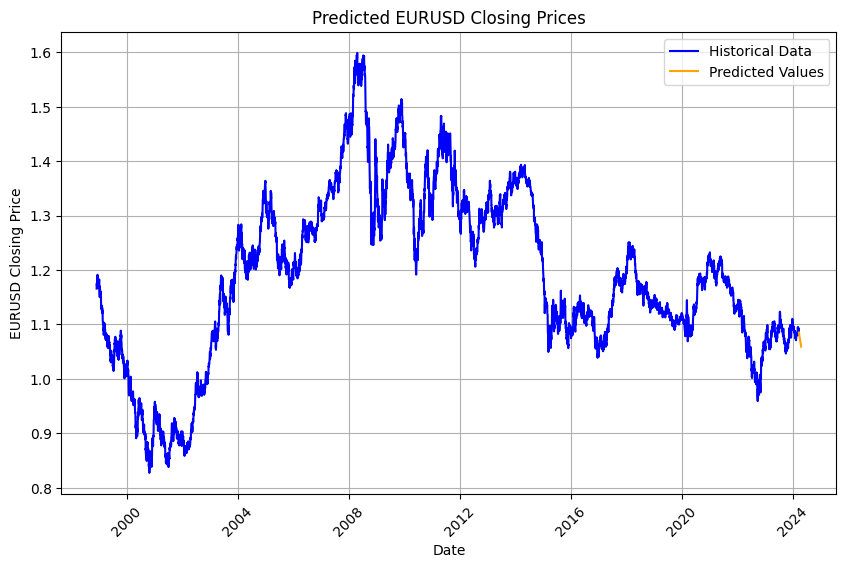

In [117]:
# Plot the predicted values over time
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Price'], label='Historical Data', color='blue')
plt.plot(forecast_df['Date'], forecast_df['Predicted Value'], label='Predicted Values', color='orange')
plt.xlabel('Date')
plt.ylabel('EURUSD Closing Price')
plt.title('Predicted EURUSD Closing Prices')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [118]:
forecast_df

,Date,Predicted Value
0,2024-03-23,1.085060
1,2024-03-24,1.084002
2,2024-03-25,1.082933
3,2024-03-26,1.081895
4,2024-03-27,1.080887
5,2024-03-28,1.079937
6,2024-03-29,1.079020
7,2024-03-30,1.078119
8,2024-03-31,1.077247
9,2024-04-01,1.076396


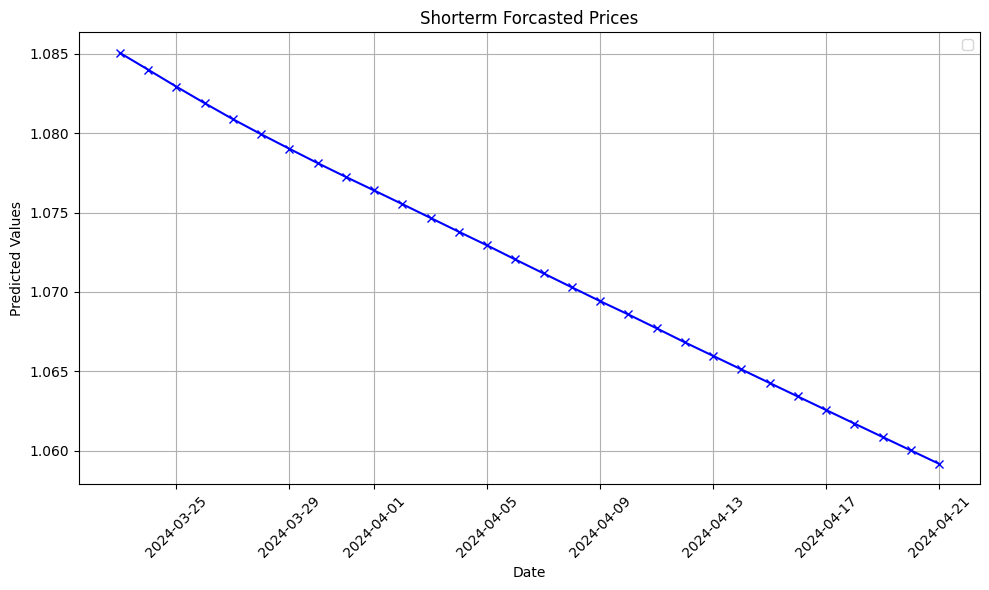

In [121]:
from matplotlib.dates import AutoDateLocator
plt.figure (figsize=(10,6))
plt.plot(forecast_df['Date'],forecast_df['Predicted Value'],marker ='x',linestyle ='-',color ='blue')
plt.xlabel('Date')
plt.ylabel('Predicted Values')
plt.title('Shorterm Forcasted Prices')
plt.xticks(rotation = 45)
plt.legend()
plt.grid(True)
locator = AutoDateLocator(minticks = 5,maxticks =15)
plt.gca().xaxis.set_major_locator(locator)
#plt.yticks(range(int(min(forcasted_val['yhat'])),int(max(forcasted_val['yhat']))+1,1))
plt.tight_layout()
plt.show()